In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

In [5]:
from google.colab import files
uploaded = files.upload()

Saving customer_merge_Category1.csv to customer_merge_Category1.csv


In [0]:
df_raw=pd.read_csv("customer_merge_Category1.csv", engine="python",encoding="euc-kr")

In [0]:
df_raw = df_raw.loc[:,"주문자ID":"카페"]

In [0]:
df_num = df_raw.select_dtypes(exclude="object")

In [32]:
df_raw_y=df_num["상품구매금액"]
df_raw_x =df_num.drop("상품구매금액",axis=1, inplace = False)

df_train_x,df_test_x,df_train_y,df_test_y = train_test_split(df_raw_x,df_raw_y,test_size=0.3, random_state=1234)


print("test data X size:{}".format(df_test_x.shape))
print("test data Y size:{}".format(df_test_y.shape))

print("train data X size:{}".format(df_train_x.shape))
print("train data Y size:{}".format(df_train_y.shape))

test data X size:(1476, 8)
test data Y size:(1476,)
train data X size:(3441, 8)
train data Y size:(3441,)


In [33]:
nn_uncustomized = MLPClassifier(random_state=1234)
nn_uncustomized.fit(df_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_uncustomized.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_uncustomized.score(df_test_x,df_test_y)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set:0.559
Accuracy on test set:0.020


In [18]:
#hidden layer parameter 변경
train_accuracy=[];test_accuracy=[]

para_hidden =[20* hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn=  MLPClassifier(hidden_layer_sizes=v_hidden, random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["HiddenLayer"] = para_hidden
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,HiddenLayer,TrainAccuracy,TestAccuracy
0,20,0.350,0.009
1,40,0.503,0.016
2,60,0.555,0.016
3,80,0.530,0.017
4,100,0.557,0.016
5,120,0.593,0.018
6,140,0.599,0.019
7,160,0.612,0.020


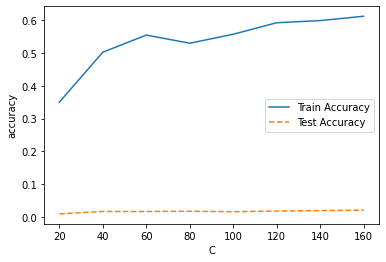

In [19]:
plt.plot(para_hidden,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("C")
plt.ylabel("accuracy")
plt.legend()

In [20]:
train_accuracy=[];test_accuracy=[]

para_function =["logistic","tanh","relu"]

for v_function in para_function:
    nn=  MLPClassifier(activation=v_function, random_state=1234)
    nn.fit(df_train_x,df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    test_accuracy.append(nn.score(df_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["ActivationFunction"] = para_function
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,TestAccuracy
0,logistic,0.460,0.015
1,tanh,0.542,0.020
2,relu,0.557,0.016


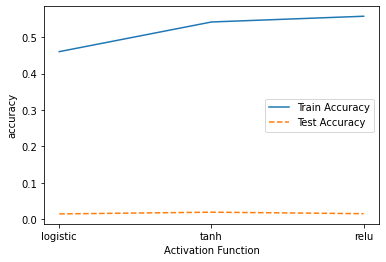

In [21]:
plt.plot(para_function,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("Activation Function")
plt.ylabel("accuracy")
plt.legend()
#tanh

In [0]:
v_feature_name = df_train_x.columns

In [34]:
nn_final = MLPClassifier(hidden_layer_sizes=(80,80),activation="tanh",solver="adam",batch_size=100, random_state=1234)
nn_final.fit(df_train_x,df_train_y)
#평가
y_pred =nn_final.predict(df_test_x)


print("Accuracy on training set:{:.3f}".format(nn_final.score(df_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_final.score(df_test_x,df_test_y)))
print("Confusion matrix;\n{}".format(confusion_matrix(df_test_y,y_pred)))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on training set:0.572
Accuracy on test set:0.022
Confusion matrix;
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


scale 변환


In [23]:
scaler =StandardScaler()
df_scaled = scaler.fit_transform(df_num_x)
df_scaled = pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()

,나이,가입-최종주문기간,한식,중식,일식,양식,분식,카페
0,0.902428,-0.706877,-0.363970,-0.420494,-0.426436,-0.351605,-0.424566,-0.162121
1,-1.437641,0.325855,2.032566,3.734589,1.836785,2.930367,-0.424566,-0.162121
2,0.200407,0.040206,-0.478091,-0.420494,-0.426436,-0.351605,-0.424566,-0.162121
3,0.902428,-0.706877,-0.363970,-0.301777,-0.426436,-0.351605,-0.295439,-0.162121
4,0.902428,-0.706877,-0.249850,-0.420494,-0.078248,0.153314,-0.166312,-0.162121


In [24]:
df_scaled_train_x,df_scaled_test_x= train_test_split(df_scaled,test_size=0.3, random_state=1234)
print("train data X size: {}".format(df_scaled_train_x.shape))
print("test data X size: {}".format(df_scaled_test_x.shape))

train data X size: (3441, 8)
test data X size: (1476, 8)


In [25]:
nn_scaled = MLPClassifier(random_state=1234)
nn_scaled.fit(df_scaled_train_x,df_train_y)

print("Accuracy on training set:{:.3f}".format(nn_scaled.score(df_scaled_train_x,df_train_y)))
print("ACcuracy on test set:{:.3f}".format(nn_scaled.score(df_scaled_test_x,df_test_y)))

ValueError: ignored

In [27]:
#hidden layer parameter 변경
train_accuracy=[];test_accuracy=[]

para_hidden =[20* hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
    nn=  MLPClassifier(hidden_layer_sizes=(v_hidden,v_hidden), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["HiddenLayer"] = para_hidden
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

ValueError: ignored

In [0]:
plt.plot(para_hidden,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_hidden, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("HiddenLayer")
plt.ylabel("accuracy")
plt.legend()
#0.1

In [0]:
#activation function 변경
train_accuracy=[];test_accuracy=[]

para_function =["logistic","tanh","relu"]

for v_function in para_function:
    nn=  MLPClassifier(activation=v_function, hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["ActivationFunction"] = para_function
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

In [0]:
plt.plot(para_function,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_function, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("Activation Function")
plt.ylabel("accuracy")
plt.legend()
#0.1

In [0]:
#solver 변경
train_accuracy=[];test_accuracy=[]

para_solver =["lbfgs","sgd","adam"]

for v_solver in para_solver:
    nn=  MLPClassifier(solver= v_solver, activation="relu", hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Solver"] = para_solver
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

In [0]:
plt.plot(para_solver,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_solver, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("Solver")
plt.ylabel("accuracy")
plt.legend()

In [0]:
#mini batch 변경
train_accuracy=[];test_accuracy=[]

para_batch =[20*batch for batch in range(1,10)]

for v_batch in para_batch:
    nn=  MLPClassifier(batch_size=v_batch, solver="adam", activation="relu", hidden_layer_sizes=(80,80), random_state=1234)
    nn.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    test_accuracy.append(nn.score(df_scaled_test_x,df_test_y))
    
df_accuracy_n=pd.DataFrame()
df_accuracy_n["Mini Batch"] = para_batch
df_accuracy_n["TrainAccuracy"]= train_accuracy
df_accuracy_n["TestAccuracy"]= test_accuracy
df_accuracy_n.round(3)

In [0]:
plt.plot(para_batch,train_accuracy, linestyle="-",label="Train Accuracy")
plt.plot(para_batch, test_accuracy, linestyle="--", label="Test Accuracy")
plt.xlabel("Batch")
plt.ylabel("accuracy")
plt.legend()

nn 모델 픽스


In [28]:
nn_final = MLPClassifier(hidden_layer_sizes=(80,80),activation="relu",solver="adam",batch_size=100, random_state=1234)
nn_final.fit(df_scaled_train_x,df_train_y)
#평가
y_pred =nn_final.predict(df_scaled_test_x)


print("Accuracy on training set:{:.3f}".format(nn_final.score(df_scaled_train_x,df_train_y)))
print("Accuracy on test set:{:.3f}".format(nn_final.score(df_scaled_test_x,df_test_y)))
print("Confusion matrix;\n{}".format(confusion_matrix(df_test_y,y_pred)))

ValueError: ignored